### To dos:

* \[ \] - Melhorar o sistema de log, permitindo escolher se ele estará ativo ou não e possibilitando que as saídas sejam redirecionadas para um arquivo de texto.
* \[ \] - Melhorar o sistema de experimentação, salvando o progresso de forma recorrente e possibilitando continuar de onde parou.

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from Scripts.Model import *
from Scripts.Parameters import N, memory_size, code_length, kappa, alpha, omega, lambd, gamma, prefferential_att, \
                               num_repetitions, T, seed
from copy import deepcopy
import matplotlib.pyplot as plt

In [19]:
mu = memory_size

In [20]:
statistics_varying_N_mu[f"{N}, {mu}"] = deepcopy(statistics_varying_kappa)


In [14]:
statistics_varying_N_mu[f"{520}, {15}"] 

In [17]:
statistics_varying_kappa = {}
for kappa in [5]:
    model = initialize_model(N, prefferential_att, memory_size, code_length, kappa, lambd, alpha, omega, gamma, seed)
    _, _, mean_statistics = evaluateModel(model, T, num_repetitions = num_repetitions)
    statistics_varying_kappa[kappa] = deepcopy(mean_statistics)
    print("")

Initializing model with parameters
N = 100 - pa = 2 
mu = 10 - m = 5 
kappa = 5 - lambda = 0 
alpha = 0 - omega = 0 
gamma = 0
Model initialized. Elapsed time: 0.0 minutes
Model evaluation started.
Number of repetitions = 5

Starting simulations.

Repetition 1/5
	Finished repetition 1/5. Elapsed time: 0.09 minutes
Repetition 2/5
	Finished repetition 2/5. Elapsed time: 0.09 minutes
Repetition 3/5
	Finished repetition 3/5. Elapsed time: 0.1 minutes
Repetition 4/5
	Finished repetition 4/5. Elapsed time: 0.1 minutes
Repetition 5/5
	Finished repetition 5/5. Elapsed time: 0.1 minutes



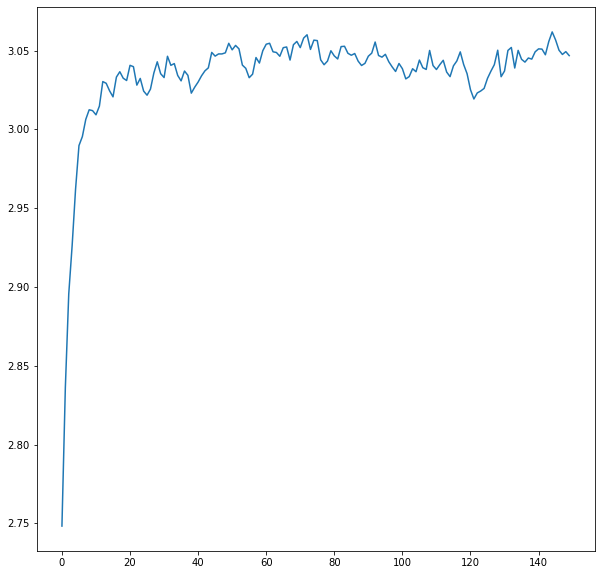

In [ ]:
fig, axs = plt.subplots(figsize = (10, 10))
X = range(T)
for kappa in statistics_varying_kappa.keys():
    axs.plot(X, statistics_varying_kappa[kappa]['Entropy'], label = r'$\kappa = {}$'.format(kappa))
    
axs.legend()

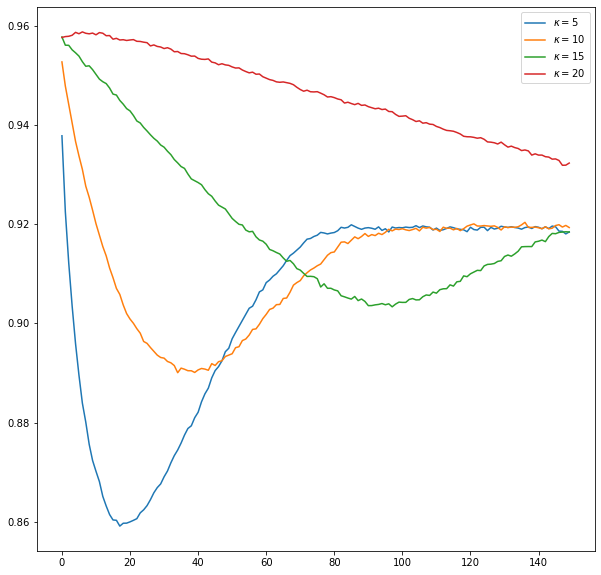

In [5]:
fig, axs = plt.subplots(figsize = (10, 10))
X = range(T)
for kappa in statistics_varying_kappa.keys():
    axs.plot(X, statistics_varying_kappa[kappa]['Proximity'], label = r'$\kappa = {}$'.format(kappa))
    
axs.legend()

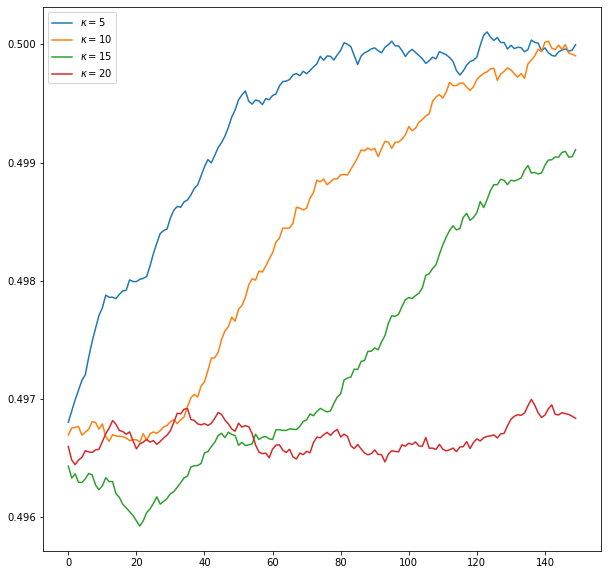

In [6]:
fig, axs = plt.subplots(figsize = (10, 10))
X = range(T)
for kappa in statistics_varying_kappa.keys():
    axs.plot(X, statistics_varying_kappa[kappa]['Polarity'], label = r'$\kappa = {}$'.format(kappa))
    
axs.legend()

In [13]:
fig, ax = heat_plot(mean_statistics['Distribution'].T, cmap = 'viridis')

KeyError: 'Distribution'

***

NameError: name 'rep_statistics' is not defined

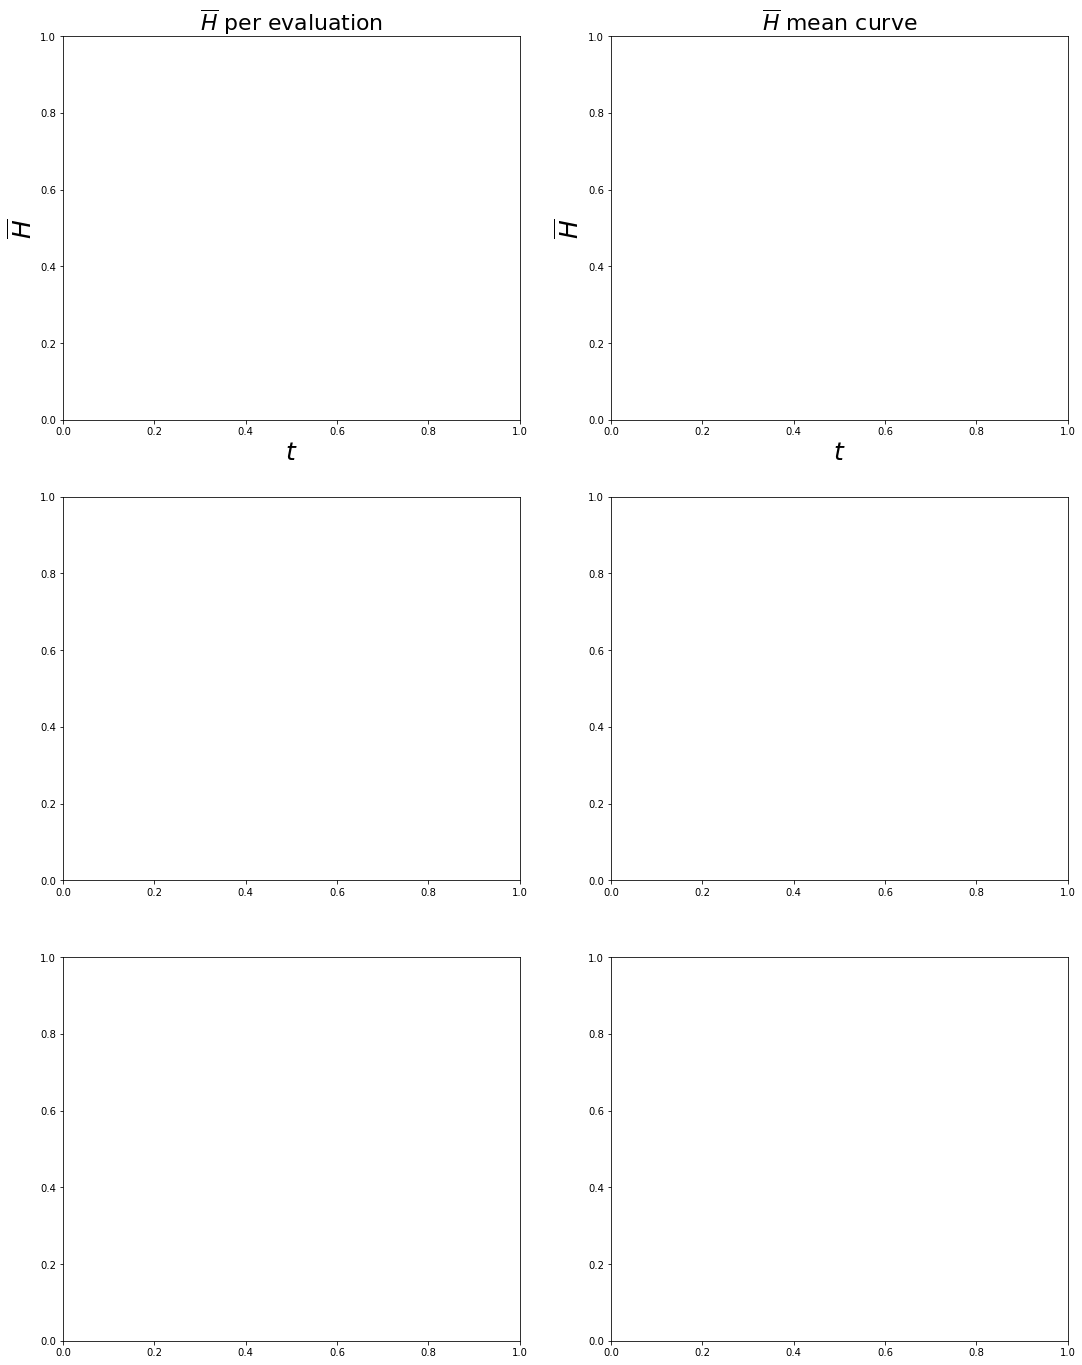

In [30]:
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (18, 24))

axs[0][0].set_ylabel(r'$\overline{H}$', fontsize = 25)
axs[0][0].set_xlabel(r'$t$', fontsize = 25)
axs[0][0].set_title(r'$\overline{H}$ per evaluation', fontsize = 22)
 
axs[0][1].set_ylabel(r'$\overline{H}$', fontsize = 25)
axs[0][1].set_xlabel(r'$t$', fontsize = 25)
axs[0][1].set_title(r'$\overline{H}$ mean curve', fontsize = 22)

X = range(T)

for rep_stats in rep_statistics:
    axs[0][0].plot(X, rep_stats['Entropy'])
    
axs[0][1].plot(X, mean_statistics['Entropy'])


axs[1][0].set_ylabel(r'$\overline{J}$', fontsize = 25)
axs[1][0].set_xlabel(r'$t$', fontsize = 25)
axs[1][0].set_title(r'$\overline{J}$ per evaluation', fontsize = 22)

axs[1][1].set_ylabel(r'$\overline{J}$', fontsize = 25)
axs[1][1].set_xlabel(r'$t$', fontsize = 25)
axs[1][1].set_title(r'$\overline{J}$ mean curve', fontsize = 22)

for rep_stats in rep_statistics:
    axs[1][0].plot(X, rep_stats['Proximity'])
    
axs[1][1].plot(X, mean_statistics['Proximity'])

axs[2][0].set_ylabel(r'$\overline{\delta}$', fontsize = 25)
axs[2][0].set_xlabel(r'$t$', fontsize = 25)
axs[2][0].set_title(r'$\overline{\delta}$ per evaluation', fontsize = 22)

axs[2][1].set_ylabel(r'$\overline{\delta}$', fontsize = 25)
axs[2][1].set_xlabel(r'$t$', fontsize = 25)
axs[2][1].set_title(r'$\overline{\delta}$ mean curve', fontsize = 22)

for rep_stats in rep_statistics:
    axs[2][0].plot(X, rep_stats['Delta'])

axs[2][1].plot(X, mean_statistics['Delta'])